># **Análise Descritiva** <h1>

In [2]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# Tamanho das fontes das plotagens. Para ajudar na visualização e organização dentro do notebook
plt.rc('font', size=20)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 
plt.rc('legend', fontsize=15)

In [4]:
# Lendo os dados.
dados = pd.read_csv('datatran2020.csv', delimiter=';')

# Cópia para recuperação.
dados_original = dados.copy()

dados.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta,01:00:00,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,...,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta,01:00:00,RJ,116.0,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta,01:52:00,SC,101.0,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,...,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta,01:15:00,RO,364.0,236,CACOAL,Velocidade Incompatível,Saída de leito carroçável,...,1,0,0,1,1,"-11,44624577","-61,43761218",SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta,01:30:00,PR,153.0,360,REBOUCAS,Ingestão de Álcool,Capotamento,...,4,0,0,6,1,"-25,67503796","-50,75089805",SR-PR,DEL7/3,UOP04/PR


In [5]:
dados.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,63530.000000,63372.000000,63530.000000,63530.000000,63530.000000,63530.000000,63530.000000,63530.000000,63530.000000,63530.000000
mean,296484.126177,212.433693,2.323973,0.083252,0.855706,0.269054,0.957799,0.158161,1.124760,1.634220
std,20941.580339,131.032981,1.709774,0.339785,1.009129,0.599838,1.342577,0.436545,1.113999,0.724952
min,260031.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,278471.250000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,296549.500000,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,314538.750000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,352488.000000,495.000000,73.000000,13.000000,42.000000,19.000000,73.000000,11.000000,44.000000,23.000000


> # **Pré-processamento** <h1>

In [6]:
#Escolha das características

dados = dados[['data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'veiculos']].copy()

Características que possam ser derivadas de outras (fase do dia - deduzido do horário, classificação - deduzida dos feridos/mortos/ilesos, regional - deduzida do estado e etc) não serão selecionadas. Além disso, características que não serão usadas na análise descritiva serão também descartadas.

> # **Removendo duplicatas** <h1>

In [7]:
dados.duplicated().any()

True

In [8]:
dados.drop_duplicates(inplace=True)
dados.duplicated().any()

False

> # **Removendo dados nulos** <h1>

In [9]:
dados.isnull().any().sum()

2

In [10]:
dados.dropna(inplace=True)
dados.isnull().any().any()

False

> # **Renomeação e conversões**

In [11]:
# Renomeando os atributos.
dados.rename({'data_inversa': 'Data', 'dia_semana': 'Dia', 'horario': 'Horário', 'uf': 'UF', 'br': 'BR', 'municipio': 'Município', 'causa_acidente': 'Causa', 
              'tipo_acidente': 'Tipo', 'sentido_via': 'Sentido', 'condicao_metereologica': 'Clima', 'tipo_pista': 'Pista', 'tracado_via': 'Traçado', 
              'pessoas': 'Pessoas', 'mortos': 'Mortos', 'feridos_leves': 'Feridos Leves', 'feridos_graves': 'Feridos Graves', 'ilesos': 'Ilesos', 
              'ignorados': 'Ignorados', 'veiculos': 'Veículos'}, axis=1, inplace=True)

In [12]:
# Capitalizando os valores dos atributos Dia e Município.
dados['Dia'] = dados['Dia'].str.title()
dados['Município'] = dados['Município'].str.title()

In [13]:
# Convertendo km para número real e BR para número inteiro.
dados['km'] = dados['km'].map(lambda x: x.replace(',', '.')).astype(float)
dados['BR'] = dados['BR'].astype(int)

> # **Excluindo outliers**
>
> Decidi excluir os outliers

In [14]:
dados.describe()

,BR,km,Pessoas,Mortos,Feridos Leves,Feridos Graves,Ilesos,Ignorados,Veículos
count,63367.000000,63367.000000,63367.000000,63367.000000,63367.000000,63367.000000,63367.000000,63367.000000,63367.000000
mean,212.433491,261.115570,2.323402,0.083371,0.856660,0.269304,0.956034,0.158032,1.634258
std,131.033347,228.782451,1.710623,0.340080,1.009636,0.599968,1.342480,0.436359,0.725270
min,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,101.000000,78.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,163.000000,192.100000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
75%,324.000000,410.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
max,495.000000,1243.000000,73.000000,13.000000,42.000000,19.000000,73.000000,11.000000,23.000000


In [15]:
# Função para remover outliers a mais de 5 desvios padrão da média.

def outliers(dados, colunas): 

    indices_incomuns = []
    todos_indices = np.zeros(len(dados), dtype=bool)

    for coluna in colunas:

        dados_coluna = np.array(dados[coluna])
        
        desvio = dados_coluna.std()
        media = dados_coluna.mean()

        indice_incomum = dados_coluna > (media + 5 * desvio)

        indices_incomuns.append(indice_incomum)

    for i in range(len(indices_incomuns)):

        todos_indices = np.logical_or(todos_indices, indices_incomuns[i])

    return todos_indices

In [16]:
# Removendo os outliers das colunas Pessoas e Veículos.
indices_outliers = outliers(dados, ['Pessoas', 'Veículos'])
dados = dados[~indices_outliers]

In [17]:
# O novo conjunto de dados é cerca de 0.7% menor.
dados.describe()

,BR,km,Pessoas,Mortos,Feridos Leves,Feridos Graves,Ilesos,Ignorados,Veículos
count,63078.000000,63078.000000,63078.000000,63078.000000,63078.000000,63078.000000,63078.000000,63078.000000,63078.000000
mean,212.364343,261.073515,2.266226,0.081803,0.841910,0.265211,0.920590,0.156711,1.620739
std,131.017338,228.803717,1.280043,0.325570,0.888023,0.571785,1.031268,0.427874,0.674559
min,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,101.000000,78.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,163.000000,192.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
75%,324.000000,410.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
max,495.000000,1243.000000,10.000000,8.000000,10.000000,8.000000,10.000000,6.000000,5.000000


> # **Correlações**

In [18]:
# Função de correlação.

def correlacoes(dados):

    corr = dados.corr().drop(dados.corr().index[0], axis='index').drop(dados.corr().index[-1], axis='columns')

    mascara = np.triu(np.ones(corr.shape)).astype(bool)

    for i in range(len(mascara)):
        for j in range(mascara.shape[1]):
            if i == j:
                mascara[i, j] = False

    sns.set(font_scale=1.6)
    sns.set_style('whitegrid')
    plt.figure(figsize=(15, 13))

    mapa_calor = sns.heatmap(corr, mask=mascara, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidths=1)

    plt.show()

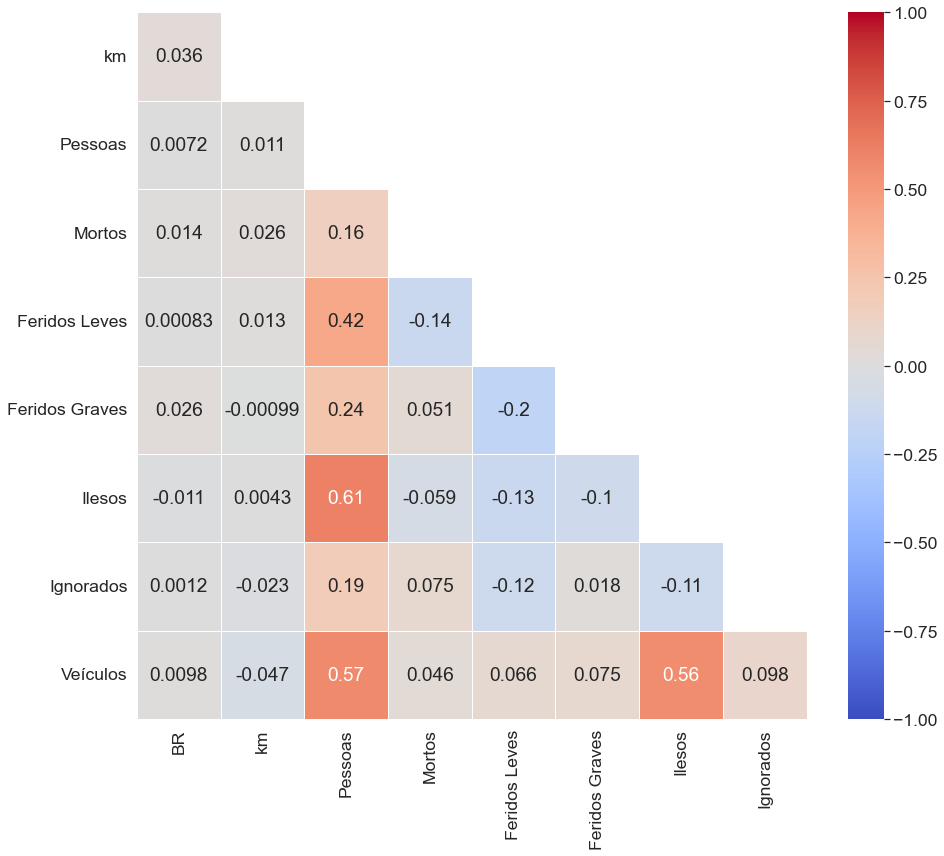

In [19]:
correlacoes(dados)

O mapa de correlações não revela muita além daquilo que já poderíamos ter previtos. Quanto maior o número de pessoas acidentadas maior tende a ser o número de veículos envolvidos, o número de mortos, feridos, ilesos e ignorados. Além disso, quanto maior o número de feridos, menor tende a ser o número de mortos, ilesos e ignorados. Há um número limitado de pessoas envolvidas em um acidente, logo ao crescer o número de feridos então o número de ilesos, ignorados e mortos precisa diminuir, pois são eventos mutuamente exclusivos.

> # **overview**

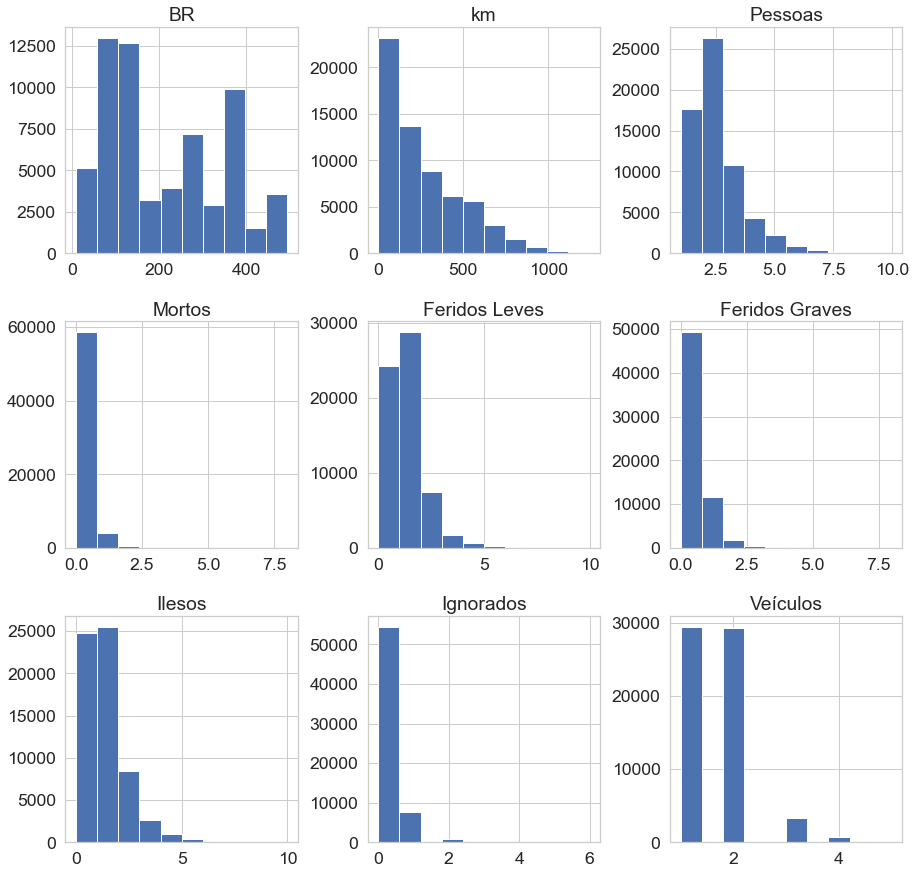

In [20]:
dados.hist(bins=10, figsize=(15, 15))
plt.show()

**Dos histogramas pode-se concluir que:**

* km: No geral, a maioria dos acidentes ocorrem nos primeiros 200 quilômetros de cada BR;
* Pessoas: A maioria dos acidentes tem 1 ou 2 pessoas envolvidas;
* Mortos e Feridos Graves: A imensa maioria dos acidentes não tem mortos ou feridos graves, isso indica que essas classes estão desbalanceadas;
* Feridos Leves e Ilesos: Pelo contrario do ponto anterior, a maioria tem feridos leves ou ilesos;
* Veículos: Quase que na totalidade dos registros tem-se 1 ou 2 veículos envolvidos.

> # **Quantidade de pessoas envolvidas em acidentes por dia e hora** 

In [21]:
# Os dados em Horário e Data é do tipo string.
type(dados['Horário'][:1].values[0]), type(dados['Data'][:1].values[0])

(str, str)

In [22]:
# Criando uma coluna com objetos datetime.
dados['Data e Hora Temp'] = dados['Data'] + dados['Horário']
dados['Data e Hora'] = dados['Data e Hora Temp'].map(lambda x: datetime.strptime(x, '%Y-%m-%d%H:%M:%S'))

# Excluindo colunas ambíguas.
dados.drop(['Data', 'Horário', 'Data e Hora Temp'], axis='columns', inplace=True)

# Definindo intervalos com períodos de 6 horas.
dados['Intervalos de Hora'] = pd.cut(dados['Data e Hora'].map(lambda x: x.hour), [0, 6, 12, 18, 24], right=False)

# Agrupando a contagem de pessoas por dia e intervalo de hora.
pessoas_dia_hora = dados.groupby(['Dia', 'Intervalos de Hora'])['Pessoas'].sum().reset_index()

# Ordenando os índices do agrupamento.
novo_indice = []
for dia in ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']:
    novo_indice += list(pessoas_dia_hora[pessoas_dia_hora['Dia'] == dia].index)
    
pessoas_dia_hora = pessoas_dia_hora.reindex(novo_indice, axis='index')

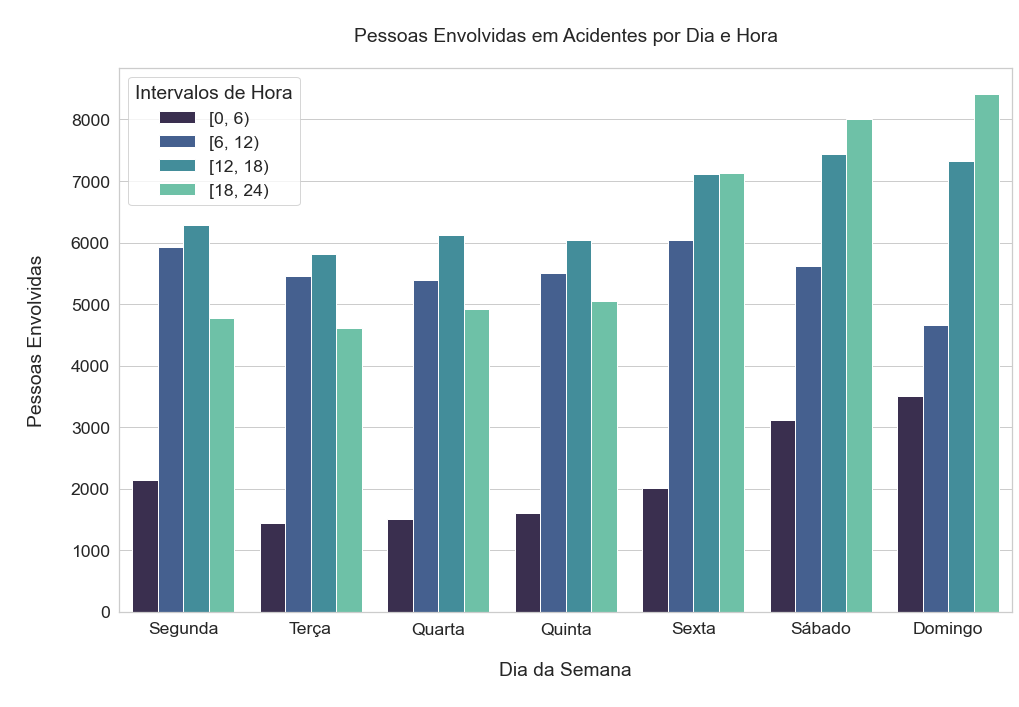

In [23]:
plt.figure(figsize=(16, 10))

barras = sns.barplot(x='Dia', y='Pessoas', hue='Intervalos de Hora', data=pessoas_dia_hora, palette='mako')
barras.set_xlabel("\nDia da Semana\n")
barras.set_ylabel("\nPessoas Envolvidas\n")
barras.set_title("\nPessoas Envolvidas em Acidentes por Dia e Hora\n")

plt.legend(loc='upper left', title='Intervalos de Hora')
plt.show()

In [24]:
# Contagem das pessoas envolvidas em acidentes, agrupadas por dia, em ordem decrescente.
dados.groupby('Dia')['Pessoas'].sum().sort_values(ascending=False)

Dia
Sábado     24190
Domingo    23891
Sexta      22289
Segunda    19136
Quinta     18195
Quarta     17924
Terça      17324
Name: Pessoas, dtype: int64

O período entre 6h e 18h de segunda à quinta é o que mais tem pessoas envolvidas em acidentes, de sexta, sábado e domingo o período com mais pessoas acidentadas é das 12h às 24h. Isso muito possivelmente se deve ao fato de que durante a semana as pessoas vão e voltam do trabalho/estudo em horário comercial que vai da parte da manhã até o entardecer, enquanto que aos finais de semanas as pessoas ficam nas ruas até mais tarde se divertindo, em igrejas e etc. Pode-se perceber também que o período da tarde e noite das sextas é o período da semana com mais acidentes, provavelmente pela pressa das pessoas em chegarem em casa após o trabalho. Isso faz com que os dias com mais pessoas acidentadas sejam a véspera do final de semana (sexta) e os finais de semana propriamente dito.

> # **Trechos mais perigosos das BR's com mais mortes**

In [25]:
dados['km'].describe()

count    63078.000000
mean       261.073515
std        228.803717
min          0.000000
25%         78.000000
50%        192.000000
75%        410.000000
max       1243.000000
Name: km, dtype: float64

In [26]:
# Definindo intervalos de 100km.
dados['Intervalos de km'] = pd.cut(dados['km'], range(0, 1301, 100), labels=range(100, 1301, 100)).astype(float)
dados[['km', 'Intervalos de km']].head()

,km,Intervalos de km
0,678.1,700.0
1,178.0,200.0
2,206.9,300.0
3,236.0,300.0
4,360.0,400.0


In [27]:
# Somando os mortos por BR em cada trecho de 100km.
mortos_br_km = dados.groupby(['BR', 'Intervalos de km'])['Mortos'].sum().reset_index().dropna()

# Filtrando os valores maiores que 0.
mortos_br_km = mortos_br_km[mortos_br_km['Mortos'] > 0]

# Ordenando por mortos de forma descrescente.
mortos_br_km.sort_values(by='Mortos', ascending=False, inplace=True)

In [28]:
# Contagem das aparições das 20 BRs mais perigosas.
mortos_br_km['BR'][:20].value_counts()

116    6
101    5
153    4
316    1
20     1
277    1
381    1
262    1
Name: BR, dtype: int64

In [29]:
# Criando filtros para a BR 101, 116 e 153.
brs = (mortos_br_km['BR'] == 116) | (mortos_br_km['BR'] == 101) | (mortos_br_km['BR'] == 153)

# Agrupando as BRs 101, 116 e 153 por contagem de mortes em cada trecho.
top_brs = mortos_br_km[brs].groupby(['BR', 'Intervalos de km'])['Mortos'].sum().reset_index()

# Adicionando valores iniciais que auxiliarão na plotagem de uma ogiva de mortes acumuladas.
for BR in [101, 116, 153]:
    top_brs = top_brs.append(pd.DataFrame({'BR': BR, 'Intervalos de km': 0, 'Mortos': 0}, index=[(top_brs['BR'] == BR).argmax()]))

# Ordenando e reindexando.
top_brs.sort_values(by=['BR', 'Intervalos de km'], inplace=True)
top_brs.index = range(len(top_brs))

# Adicionando uma coluna de mortes acumuladas para todas as BRs.
top_brs['Mortes Acumuladas'] = top_brs.groupby(['BR'])['Mortos'].cumsum()

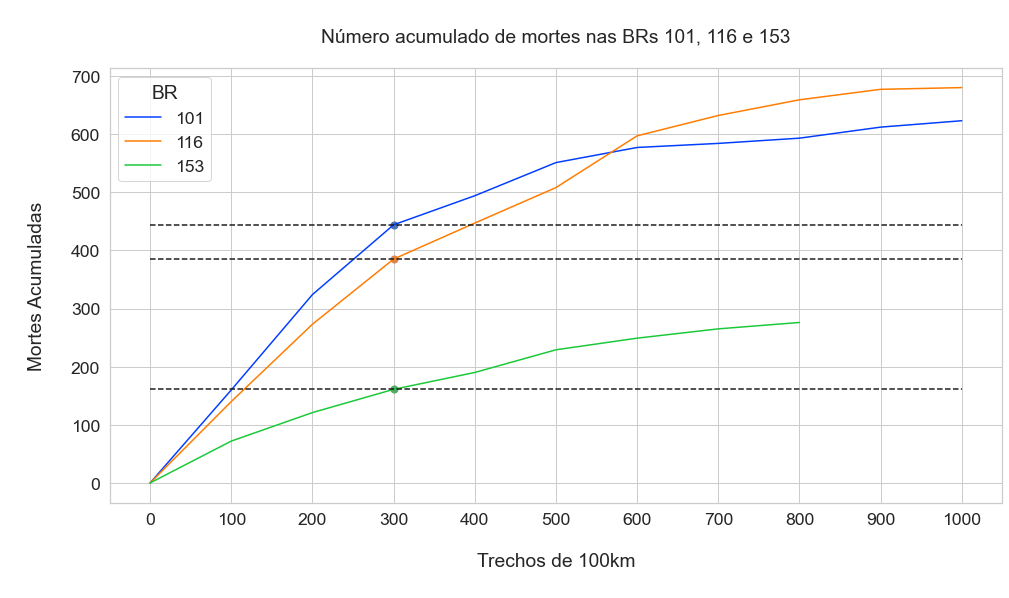

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

linhas = sns.lineplot(ax=ax, x='Intervalos de km', y='Mortes Acumuladas', hue='BR', data=top_brs, palette='bright')
linhas.set_xlabel("\nTrechos de 100km\n")
linhas.set_xticks(top_brs['Intervalos de km'].unique())
linhas.set_ylabel("\nMortes Acumuladas\n")
linhas.set_title("\nNúmero acumulado de mortes nas BRs 101, 116 e 153\n")

for BR in [101, 116, 153]:
    idx = (top_brs['BR'] == BR) & (top_brs['Intervalos de km'] == 300)
    plt.plot([0, 1000], [top_brs[idx]['Mortes Acumuladas'].iloc[0]] * 2, 'k--')
    plt.scatter([300], [top_brs[idx]['Mortes Acumuladas'].iloc[0]], s=50)

plt.legend(loc='best', title='BR')
plt.show()

A BR 116 é a rodovia com mais mortes do país, seguida da BR 101 e BR 153. Pelo gráfico pode-se perceber que a maioria dos acidentes fatais nessas BRs ocorrem majoritariamente nos primeiros 300 kms. Talvez seja melhor colocar mais postos de socorro no decorrer desses 300 kms ou aumentar a fiscalização nesses trechos. Essas rodovias estão localizadas no norte e nordeste do país, o trafego nessas rodovias é majoritariamente de cargas pesadas.

In [31]:
# Quantidade de mortes nas 3 BRs mais violentas.
mortos_br_km.groupby('BR')['Mortos'].sum().sort_values(ascending=False).head(3)

BR
116    680
101    623
153    276
Name: Mortos, dtype: int64

In [32]:
# Função que retorna o valor mais comum de uma série de dados.
def mais_comum(serie):
    return serie.value_counts(ascending=False)[0:1].index[0]

In [33]:
# Causa mais comum de acidente em cada BR, por trechos.
dados.pivot_table('Causa', 'BR', 'Intervalos de km', aggfunc=mais_comum).loc[[101, 116, 153]][[100, 200, 300]]

Intervalos de km,100.0,200.0,300.0
BR,,,
101,Falta de Atenção à Condução,Falta de Atenção à Condução,Falta de Atenção à Condução
116,Falta de Atenção à Condução,Falta de Atenção à Condução,Falta de Atenção à Condução
153,Falta de Atenção à Condução,Falta de Atenção à Condução,Falta de Atenção à Condução


In [34]:
# Tipo mais comum.
dados.pivot_table('Tipo', 'BR', 'Intervalos de km', aggfunc=mais_comum).loc[[101, 116, 153]][[100, 200, 300]]

Intervalos de km,100.0,200.0,300.0
BR,,,
101,Colisão traseira,Colisão traseira,Colisão traseira
116,Colisão traseira,Colisão traseira,Colisão traseira
153,Saída de leito carroçável,Saída de leito carroçável,Saída de leito carroçável


In [35]:
mais_comum(dados.Causa), mais_comum(dados.Tipo)

('Falta de Atenção à Condução', 'Colisão traseira')

Em todos os casos analisados a falta de atenção à condução foi a causa de acidente mais comum. Na BR 101 e 116 o tipo de acidente que mais ocorreu foi colisão traseira, já na BR 153 foi saída de leito carroçável.

No apanhado geral do país as causas mais comuns se repetem, _colisão traseira_ e _saída de leito carroçável_.

> **Cidades com mais acidentes e suas causas mais comuns**

In [36]:
# Contagem de municípios.
len(dados['Município'].unique())

1783

In [37]:
# 5 causas de acidente mais comum por município.
dados.groupby('Município')['Causa'].apply(mais_comum).value_counts().head()

Falta de Atenção à Condução                          1085
Desobediência às normas de trânsito pelo condutor     203
Velocidade Incompatível                               157
Ingestão de Álcool                                     79
Defeito Mecânico no Veículo                            59
Name: Causa, dtype: int64

In [38]:
# Municípios com mais acidentes.
dados['Município'].value_counts().head(3)

Brasilia     1033
Curitiba      938
Guarulhos     635
Name: Município, dtype: int64

As cidades que lideram o ranking de acidentes do país em rodovias federais são Brasília, Curitiba e Guarulhos. Dentre as 1783 cidades analisadas cerca de 81% tem a falta de atenção, velocidade incompatível ou desobediência às normas como a causa mais comum de acidente.

> **Tipo mais comum de acidente por sentido e traçado da via**

In [39]:
dados.pivot_table('Tipo', 'Traçado', 'Sentido', aggfunc=mais_comum)

Sentido,Crescente,Decrescente
Traçado,,
Curva,Saída de leito carroçável,Saída de leito carroçável
Desvio Temporário,Saída de leito carroçável,Saída de leito carroçável
Interseção de vias,Colisão transversal,Colisão transversal
Não Informado,Colisão traseira,Colisão traseira
Ponte,Colisão traseira,Colisão com objeto estático
Reta,Colisão traseira,Colisão traseira
Retorno Regulamentado,Colisão transversal,Colisão transversal
Rotatória,Colisão transversal,Colisão transversal
Túnel,Colisão frontal,Colisão com objeto estático


Em curvas e desvios o tipo de acidente mais comum é a saída de leito, isso se explica porque o veículo está em um movimento com uma força centrífuga o jogando radialmente para fora e dependendo da velocidade o veículo acaba saindo pela tangente. Já em intersecções de vias, rotatórias e retornos o mais comum é ocorrer colisões transversais, o que já é auto explicativo. É interessante perceber que em pontes e túneis, lugares estes que geralmente têm obstáculos como sinalizadores luminosos, placas e grades, o tipo de acidente mais comum em descidas é a colisão com objeto estático.

> **Percentual de mortos, feridos e ilesos por estado**

In [40]:
# Soma dos mortos, feridos e ilesos por estado.
estado_acidentes = dados.groupby('UF')[['Mortos', 'Feridos Leves', 'Feridos Graves', 'Ilesos']].sum()

# Calculando o percentual.
estado_acidentes_pct = estado_acidentes.div(estado_acidentes.sum(axis=1), axis=0)

# Ordenando.
estado_acidentes_pct.sort_values(by='Mortos', ascending=False, inplace=True)

# 5 primeiros e 5 últimos estados da ordenação.
estado_acidentes_pct.loc[list(estado_acidentes_pct.index[:5]) + list(estado_acidentes_pct.index[-5:])]

,Mortos,Feridos Leves,Feridos Graves,Ilesos
UF,,,,
MA,0.093214,0.308112,0.170047,0.428627
TO,0.075722,0.332553,0.160031,0.431694
BA,0.064993,0.387734,0.123709,0.423565
AL,0.062643,0.354469,0.174179,0.408709
PI,0.062119,0.338205,0.174584,0.425091
RS,0.024989,0.409845,0.098557,0.466609
SC,0.024696,0.420893,0.117340,0.437071
AC,0.021997,0.402707,0.160745,0.414552
DF,0.016630,0.402626,0.074836,0.505908


O estado com maior percentual de mortos, Maranhão, tem um percentual cerca de 6,6 vezes maior que o do Amapá, o estado com menor percentual. Todos os 5 estados com maior percentual de mortos ficam no nordeste do país. Em contraste a isso, mais da metade das pessoas envolvidas em acidentes no Distrito Federal saem ilesas.

> **Datas com mais acidentes**

In [41]:
# Criando coluna de datas.
dados['Datas'] = dados['Data e Hora'].map(lambda x: x.date())

# Soma dos mortos por data.
mortos_data = dados.groupby('Datas')['Mortos'].sum()

# 20 dias com mais mortes.
mortos_data.sort_values(ascending=False)[:20]

Datas
2020-12-20    52
2020-12-19    37
2020-09-06    35
2020-08-23    33
2020-11-22    31
2020-05-31    30
2020-11-02    29
2020-08-30    29
2020-11-07    28
2020-11-29    28
2020-07-26    28
2020-02-02    28
2020-11-14    27
2020-07-21    27
2020-11-21    27
2020-09-20    27
2020-11-28    26
2020-10-09    26
2020-12-12    26
2020-12-13    26
Name: Mortos, dtype: int64

**Dos 20 dias mais fatais podemos identificar os principais feriados de fim de ano:**

* 6 de Setembro: 35 mortos (Véspera da Independência do Brasil)
* 1 e 2 de Novembro: 54 mortos (Véspera de Finados e Finados)
* 14 de Novembro: 27 mortos (Véspera da Proclamação da República)
* 19 e 20 de Dezembro: 89 mortos (Viagens de festas de fim de ano)

> # **Análise Preditiva**

In [42]:
# Bibliotecas\Modelos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Métricas de desempenho.
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Pré-processamento.
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import TransformerMixin, BaseEstimator

# Pipeline.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Semente para permitir reprodutibilidade.
np.random.seed(0)

> # **Pré-processamento**
Pipeline

Para X:

* Extrair a hora do objeto datetime e discretizá-la em um intervalo rotulado;
* Extrair o dia da semana do objeto datetime;
* Codificar os atributos categóricos e nomimais: UF, BR, Município, Causa, Tipo, Sentido, Clima, Pista e Traçado;
* Discretizar o km em intervalos rotulados;
* Escalonar as variáveis numéricas: Veículos, Pessoas, Hora, Dia, km;.

Para y:

* Codificar os alvos em binário

In [43]:
# Vamos excluir os atributos que serão redefinidos ou que não entrarão na análise preditiva por não te-los de antemão.
dados.drop(['Intervalos de Hora', 'Dia', 'Causa', 'Tipo', 'Ignorados', 'Intervalos de km', 'Datas', 'Mortos', 
            'Feridos Leves', 'Feridos Graves'], axis=1, inplace=True)

In [44]:
dados.head()

,UF,BR,km,Município,Sentido,Clima,Pista,Traçado,Pessoas,Ilesos,Veículos,Data e Hora
0,TO,153,678.1,Gurupi,Crescente,Nublado,Simples,Reta,5,0,1,2020-01-01 01:00:00
1,RJ,116,178.0,Nova Iguacu,Decrescente,Céu Claro,Dupla,Reta,2,1,1,2020-01-01 01:00:00
2,SC,101,206.9,Sao Jose,Crescente,Nublado,Simples,Reta,2,1,2,2020-01-01 01:52:00
3,RO,364,236.0,Cacoal,Decrescente,Nublado,Simples,Reta,1,0,1,2020-01-01 01:15:00
4,PR,153,360.0,Reboucas,Crescente,Garoa/Chuvisco,Simples,Curva,6,0,1,2020-01-01 01:30:00


In [45]:
# Definindo uma classe que adicionará alguns atributos e implementará os métodos fit e transform para posterior uso no Pipeline.
class adicionar_atributos(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        dados_ = X[['Pessoas', 'Veículos', 'Data e Hora', 'km']].copy()

        dados_['Cod Hora'] = pd.cut(dados_['Data e Hora'].map(lambda x: x.hour), bins=range(0, 25, 6), labels=range(1, 5), right=False)
        dados_['Cod Dia'] = dados_['Data e Hora'].map(lambda x: x.dayofweek)
        dados_['Cod km'] = pd.cut(dados_['km'], bins=range(0, 1300, 100), labels=range(1, 13))
        
        dados_.drop(['Data e Hora', 'km'], axis=1, inplace=True)

        return dados_

In [46]:
# Classe para transformar os alvos em valores binários.
class valor_binario(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        dados_ = X.copy()

        return dados_.astype(bool).astype(int)

In [47]:
# Pipeline que adiciona atributos e escalona os valores numéricos, além de codificar os dados categóricos/nominais.
pipeline_x_1 = ColumnTransformer([('num', 
                               Pipeline([('adicionar_atributos', adicionar_atributos()),
                                         ('escalonamento', StandardScaler())]), 
                               ['Pessoas', 'Veículos', 'Data e Hora', 'km']),
                              ('cat', 
                               OneHotEncoder(), 
                               ['UF', 'BR', 'Município', 'Sentido', 'Clima', 'Pista', 'Traçado'])])

pipeline_y = Pipeline([('valor_binario', valor_binario())])

In [48]:
# Todas as instâncias e todos os atributos.
features = ['UF', 'BR', 'Município', 'Sentido', 'Clima', 'Pista', 'Traçado', 'Pessoas', 'Veículos', 'Data e Hora', 'km']
X_set = dados[features]

# Alvos de todas as instâncias.
target = ['Ilesos']
y_set = dados[target]

In [49]:
# Treinando o pipeline com os dados.
X_set = pipeline_x_1.fit_transform(X_set)
y_set = pipeline_y.fit_transform(y_set)

In [50]:
X_set

<63078x1955 sparse matrix of type '<class 'numpy.float64'>'
	with 756936 stored elements in Compressed Sparse Row format>

In [51]:
y_set.head()

,Ilesos
0,0
1,1
2,1
3,0
4,0


In [52]:
# Inicialmente as instâncias têm 10 características, depois de passar pelo pipeline elas têm 1955.
dados[features].shape[1], X_set.shape[1]

(11, 1955)

Seleção de Características¶
A árvore de decisão usa uma função de custo chamada CART para decidir se deve dividir em nó ou não. Essa função tem duas variáveis, sendo a primeira delas o tamanho dos nós que serão gerados na divisão, e a segundo é um índice de pureza (gini ou entropia) que se baseia em um limiar associado a uma feature aleatória. O controle do tamanho permite gerarmos árvores balanceada, já os limiares permitem detectarmos as várias que são mais importantes e que mais diferenciam as instâncias. Sabendo disso podemos usar o método featureimportances do objeto da classe DecisionTreeClassifier para encontramos quais são tais features

In [53]:
arvore_clf = DecisionTreeClassifier(random_state=0)
arvore_clf.fit(X_set, y_set)

DecisionTreeClassifier(random_state=0)

In [54]:
extra_attribs = ['Cod Hora', 'Cod Dia', 'Cod km']

cat_encoder = pipeline_x_1.named_transformers_['cat'].categories_

cat_encoder_attribs = []
for i in range(len(cat_encoder)):
    cat_encoder_attribs.extend(list(cat_encoder[i]))
    
atributos = ['Pessoas', 'Veículos'] + extra_attribs + cat_encoder_attribs

In [55]:
pd.DataFrame(zip(arvore_clf.feature_importances_, atributos)).sort_values(by=0, ascending=False).head(30)

,0,1
1,0.291869,Veículos
3,0.083842,Cod Dia
0,0.051381,Pessoas
2,0.041551,Cod Hora
1930,0.020954,Crescente
1931,0.020630,Decrescente
1933,0.018292,Céu Claro
1950,0.013598,Reta
1939,0.012694,Nublado
1948,0.011214,Não Informado


As características mais relevantes para definir se um acidente tem ou não ilesos são:

* Quantidade de veículos envolvidos;
* Data e hora do acidente;
* Quantidade de pessoas envolvidas;
* Sentido, traçado e tipo de pista;
* Clima.

In [56]:
# Cosntruiremos outro pipeline, agora selecionando só as features mais importantes.
class adicionar_atributos_importantes(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        dados_ = X[['Pessoas', 'Veículos', 'Data e Hora']].copy()

        dados_['Cod Hora'] = pd.cut(dados_['Data e Hora'].map(lambda x: x.hour), bins=range(0, 25, 6), labels=range(1, 5), right=False)
        dados_['Cod Dia'] = dados_['Data e Hora'].map(lambda x: x.dayofweek)        
        dados_.drop(['Data e Hora'], axis=1, inplace=True)

        return dados_

pipeline_x_2 = ColumnTransformer([('num', 
                               Pipeline([('adicionar_atributos_importantes', adicionar_atributos_importantes()),
                                         ('escalonamento', StandardScaler())]), 
                               ['Pessoas', 'Veículos', 'Data e Hora']),
                              ('cat', 
                               OneHotEncoder(), 
                               ['Sentido', 'Clima', 'Pista', 'Traçado'])])

In [57]:
features_importantes = ['Veículos', 'Data e Hora', 'Pessoas', 'Sentido', 'Traçado', 'Pista', 'Clima']
X_set = dados[features_importantes]

In [58]:
X_set = pipeline_x_2.fit_transform(X_set).toarray()

In [59]:
X_set.shape

(63078, 29)

> # **Treinando modelos**

In [60]:
def scores(y, y_pred):
    
    for metrica, nome in [(accuracy_score, 'Acurácia'), 
                              (f1_score, 'Score f1'), 
                              (precision_score, 'Precisão'), 
                              (recall_score, 'Revocação'), 
                              (roc_auc_score, 'Área ROC')]:
                              
            print(f'{nome}: {round(100 * metrica(y, y_pred), 2)}%', end='  |  ')
    
    print('\n')

In [61]:
# Dividindo os dados em um conjunto de treino e um de teste.
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.1, random_state=0)

# Função para mostrar o desempenho.
def display(modelo):

    # Predição da Validação Cruzada.
    y_pred = cross_val_predict(modelo, X_train, y_train)

    scores(y_train, y_pred)

> # **Regressão Logística**

In [62]:
log_clf = LogisticRegression(solver='liblinear', random_state=0)

In [63]:
display(log_clf)

Acurácia: 77.02%  |  Score f1: 80.15%  |  Precisão: 84.21%  |  Revocação: 76.47%  |  Área ROC: 77.17%  |  



> # **SVM Linear**

In [64]:
linear_svm_clf = LinearSVC(loss='hinge')

In [65]:
display(linear_svm_clf)

Acurácia: 76.58%  |  Score f1: 79.47%  |  Precisão: 84.92%  |  Revocação: 74.67%  |  Área ROC: 77.1%  |  



> # **Árvore de Decisão**

In [68]:
arvore_clf = DecisionTreeClassifier(random_state=0)

In [69]:
display(arvore_clf)

Acurácia: 72.99%  |  Score f1: 77.11%  |  Precisão: 79.37%  |  Revocação: 74.98%  |  Área ROC: 72.45%  |  



> # **Random Forest**

In [70]:
rnd_clf = RandomForestClassifier(random_state=0)

In [71]:
display(rnd_clf)

Acurácia: 74.41%  |  Score f1: 78.98%  |  Precisão: 78.73%  |  Revocação: 79.24%  |  Área ROC: 73.1%  |  



> # **Classificador por votação**

In [72]:
vot_clf = VotingClassifier([('log_clf', log_clf), 
                            ('linear_svm_clf', linear_svm_clf), 
                            ('rnd_clf', rnd_clf)])

In [73]:
display(vot_clf)

Acurácia: 76.9%  |  Score f1: 79.95%  |  Precisão: 84.44%  |  Revocação: 75.92%  |  Área ROC: 77.17%  |  



Embora o modelo de Classificação por Votação tenha tido melhor precisão, no geral, o modelo de Regressão Logística se saiu melhor. Vamos avaliá-lo no conjunto de teste

In [74]:
log_clf.fit(X_train, y_train)

y_pred = log_clf.predict(X_test)

scores(y_test, y_pred)

Acurácia: 77.09%  |  Score f1: 80.13%  |  Precisão: 84.41%  |  Revocação: 76.26%  |  Área ROC: 77.32%  |  

